## King County Dataset Analysis
- Seeta Rajpara
- Module 1 Project

## Exploring the Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_housedata=pd.read_csv('kc_house_data.csv')

In [3]:
df_housedata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

a few of the above column names seem to be important to follow:

-price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode

In [4]:
df_housedata.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- the most expensive property is $7.7m

- 75% of the properties fall below $645,000 
- max number of bathrooms is 8 
- max number of bedrooms is 33 (outlier)
- median number of bedrooms is 3
- 75% of the properties are at 2.5 bathrooms or below
- these values are of concern because they skew the mean

In [5]:
df_housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Data Cleaning and Missing Data
- from .info() method above, we can see there are some data types that are a bit weird: 
    - sqft_basement should probably be a float or integer data type as the other sqft values are not objects
    - we don't have the same number of data points for waterfront, view, or yr_renovated
    - we should change the zip code data type to a string as it's not a true quantity but categorical instead

In [6]:
df_housedata['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1990.0        1
225.0         1
2580.0        1
3260.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

- need to remove '?' from sqft_basement

In [7]:
df_housedata['sqft_basement'] = df_housedata['sqft_basement'].replace('?',0)

In [8]:
df_housedata['sqft_basement'].value_counts()

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
906.0         1
2400.0        1
475.0         1
1245.0        1
1798.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [9]:
# change basement data type to float
df_housedata['sqft_basement']=df_housedata['sqft_basement'].astype(float)

In [10]:
# change bedrooms data type to float
df_housedata['bedrooms']=df_housedata['bedrooms'].astype(float)

In [11]:
# change sqft_living data type to float
df_housedata['sqft_living']=df_housedata['sqft_living'].astype(float)

In [12]:
# change sqft_lot data type to float
df_housedata['sqft_lot']=df_housedata['sqft_lot'].astype(float)

In [13]:
# change sqft_above data type to float
df_housedata['sqft_above']=df_housedata['sqft_above'].astype(float)

In [14]:
# change condition data type to float
df_housedata['condition']=df_housedata['condition'].astype(float)

In [15]:
# change grade data type to float
df_housedata['grade']=df_housedata['grade'].astype(float)

In [16]:
# change zipcode data type to string
df_housedata['zipcode']=df_housedata['zipcode'].astype(object)

In [17]:
# missing data
total=df_housedata.isnull().sum().sort_values(ascending=False)
percent=(df_housedata.isnull().sum()/df_housedata.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
sqft_lot15,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000


- not more than 15% of any parameter missing, not missing any important data
- however, for regression models to work, we should alter any missing data or "NaN" values from the dataset

In [18]:
df_housedata['view'] = df_housedata['view'].fillna(value=df_housedata['view'].median())

In [19]:
df_housedata['waterfront'] = df_housedata['waterfront'].fillna(value=df_housedata['waterfront'].median())

In [20]:
df_housedata['yr_renovated'] = df_housedata['yr_renovated'].fillna(value=df_housedata['yr_renovated'].median())

## Plotting Data
- start with plotting the histogram of house prices to get an idea of the distribution pattern
- build Pearson correlation heatmap to determine which variables are closely related to each other, specifically with respect to price
- plot specific variables (scatterplot for quantitative variables, boxplot for categorical) against price to see which parameters have the most impact on housing price

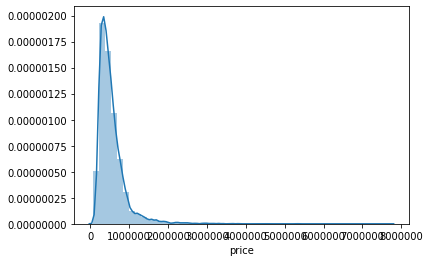

In [21]:
# get understanding of how the 'price' variable is distributed
# 'price' histogram raw data
sns.distplot(df_housedata['price'])

- 'price' definitely not a normal distribution
- will standardize this later

In [22]:
# calculate skewness and kurtosis
print("Skewness: %f" % df_housedata['price'].skew())
print("Kurtosis: %f" % df_housedata['price'].kurt())

Skewness: 4.023365
Kurtosis: 34.541359


- the kurtosis value is super high, indicates a skewed distribution that does not follow standard curve patterns
- normal kurtosis should be around 3
- the skewness is > 0, indicating skewness leaning towards one direction

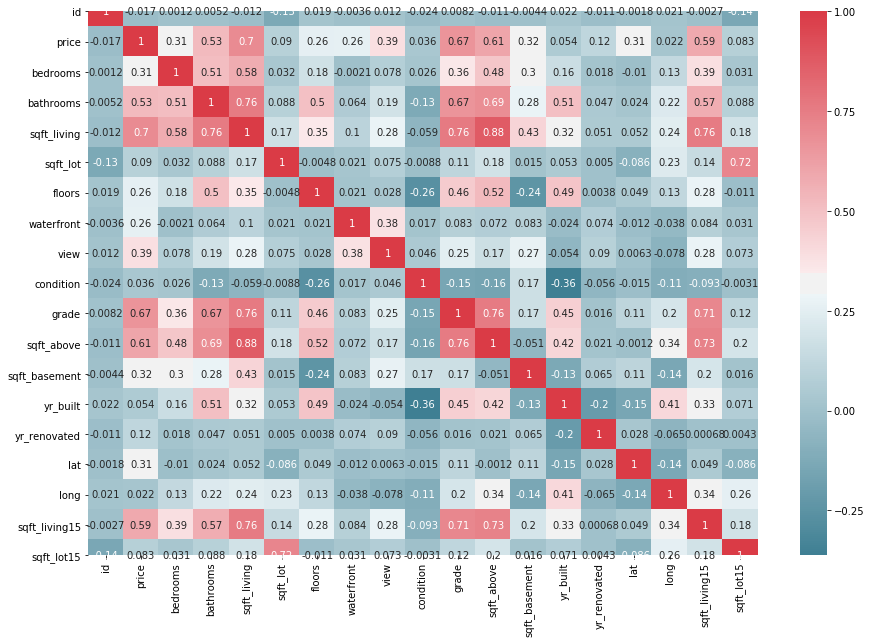

In [23]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df_housedata.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df_housedata)

- the heatmap above shows strong correlations between the following variables:
    - grade, price, bedrooms, bathrooms, sqft_living, sqft_above, yr_built

## Plotting Variables to Determine Relationships

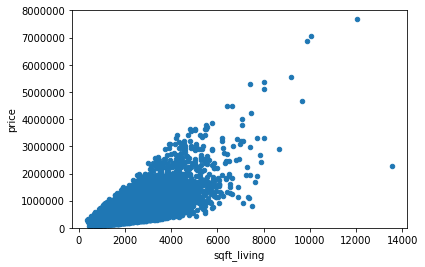

In [24]:
# scatterplot sqft_living/price
var='sqft_living'
data=pd.concat([df_housedata['price'], df_housedata[var]],axis=1)
data.plot.scatter(x=var, y='price',ylim=(0,8000000));

- results look like linear relationship (conical)

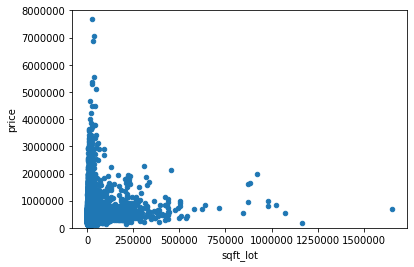

In [25]:
# scatterplot sqft_lot/price
sqft_lot='sqft_lot'
data=pd.concat([df_housedata['price'], df_housedata[sqft_lot]],axis=1)
data.plot.scatter(x=sqft_lot, y='price',ylim=(0,8000000));

- sqft_lot does not seem to be reported correctly for all homes, use sqft_living instead

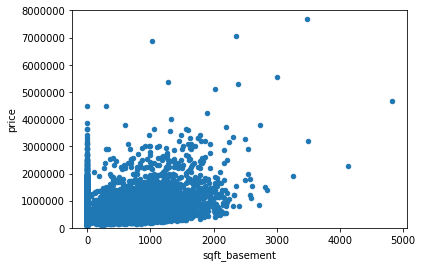

In [26]:
# scatterplot sqft_basement/price
sqft_bsmt='sqft_basement'
data=pd.concat([df_housedata['price'], df_housedata[sqft_bsmt]],axis=1)
data.plot.scatter(x=sqft_bsmt, y='price',ylim=(0,8000000));

- seems like some basement values were not reported
- don't use this for prediction of house prices

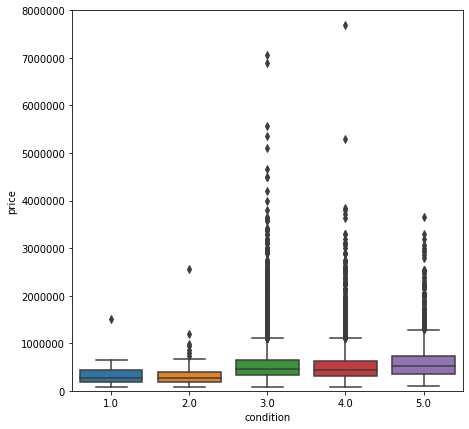

In [27]:
# boxplot condition/price
condition='condition'
data=pd.concat([df_housedata['price'], df_housedata[condition]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=condition, y='price', data=data)
fig.axis(ymin=0, ymax=8000000);

- condition doesn't really seem to have any significant correlation with price although there's a slight increase overall

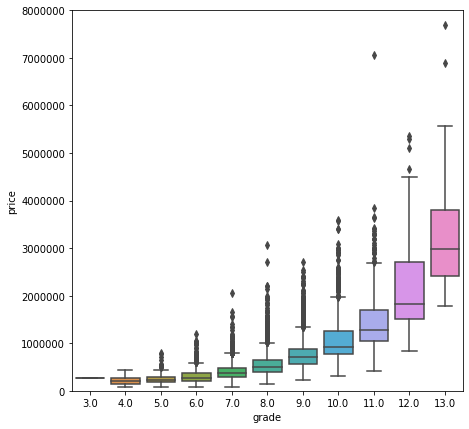

In [28]:
# boxplot grade/price
grade='grade'
data=pd.concat([df_housedata['price'], df_housedata[grade]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=grade, y='price', data=data)
fig.axis(ymin=0, ymax=8000000);

- grade definitely has a relationship with price
- increasing grade with increasing price

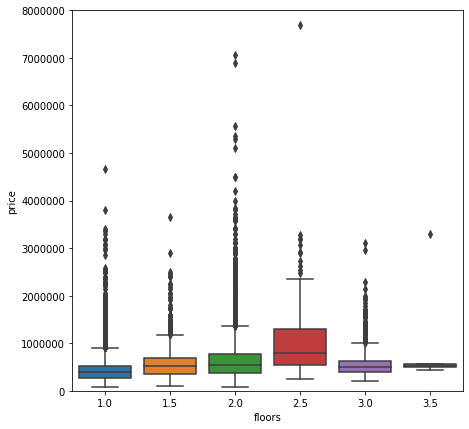

In [29]:
# boxplot floors/price
floors='floors'
data=pd.concat([df_housedata['price'], df_housedata[floors]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=floors, y='price', data=data)
fig.axis(ymin=0, ymax=8000000);

- floors does not seem to show much of a relationship
- although at first it looks like increase in price as rooms increase
- until there are > 2.5 rooms, then price decreases again

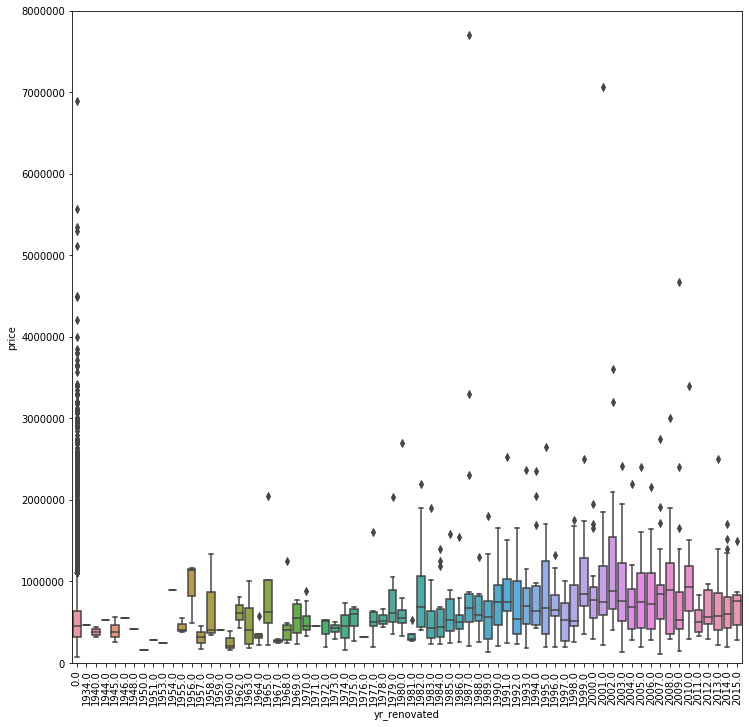

In [30]:
# boxplot yr_renovated/price
yr_renovated='yr_renovated'
data=pd.concat([df_housedata['price'], df_housedata[yr_renovated]], axis=1)
f, ax = plt.subplots(figsize=(12,12))
fig = sns.boxplot(x=yr_renovated, y='price', data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=8000000);

- with more recent renovation, price seems to increase

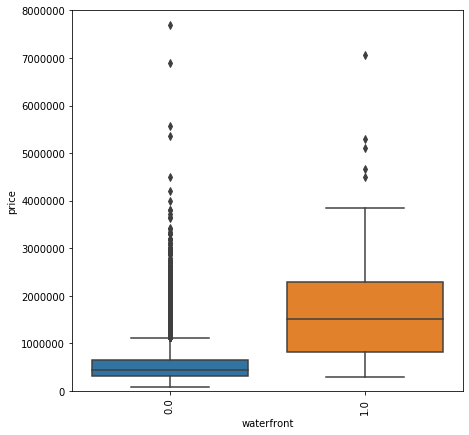

In [31]:
# boxplot waterfront/price
waterfront='waterfront'
data=pd.concat([df_housedata['price'], df_housedata[waterfront]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=waterfront, y='price', data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=8000000);

- waterfront yes/no seems to correlate with increased price but there is considerable overlap
- some waterfront properties might not be reported or misreported as "0"
- would like to map the zipcodes and indiciate which homes have waterfront, we can determine this geographically

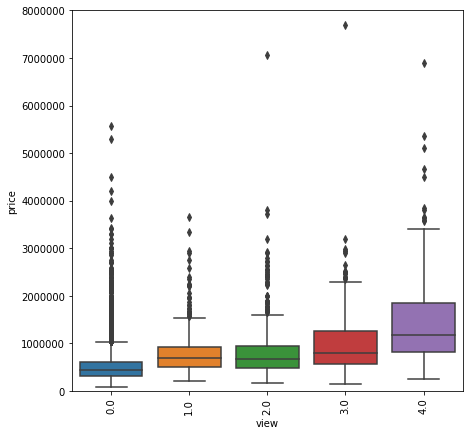

In [32]:
# boxplot view/price
view='view'
data=pd.concat([df_housedata['price'], df_housedata[view]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=view, y='price', data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=8000000);

In [33]:
df_housedata['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

- it looks like the more times someone viewed the home, the higher the price of the house
- this makes sense, if you're about to pay over $1m on a home, you'd probably want to make sure it's perfect

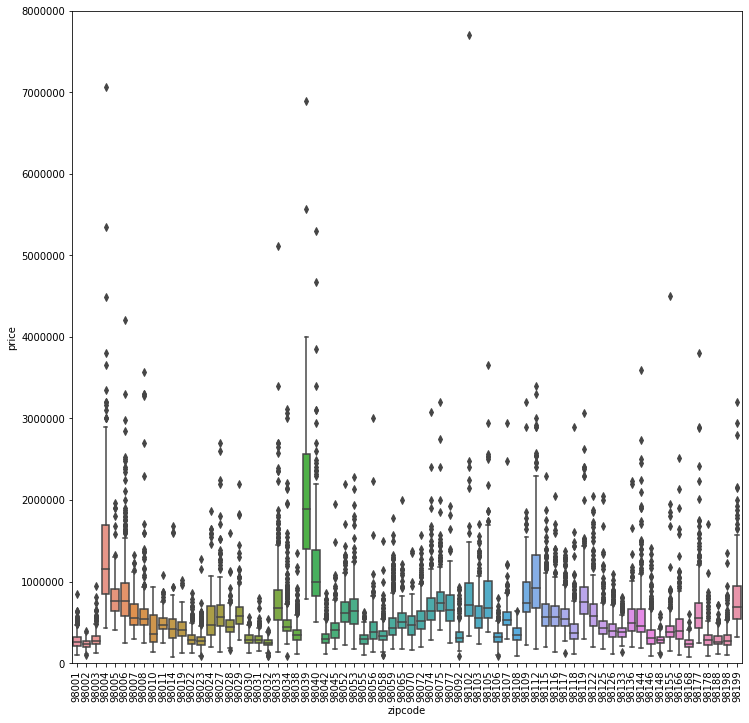

In [34]:
# boxplot zipcode/price
zipcode='zipcode'
data=pd.concat([df_housedata['price'], df_housedata[zipcode]], axis=1)
f, ax = plt.subplots(figsize=(12,12))
fig = sns.boxplot(x=zipcode, y='price', data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=8000000);

- specific zipcodes seem to have more expensive houses, obviously
- look into zipcode 98039; this seems to be the priciest neighborhood to live in

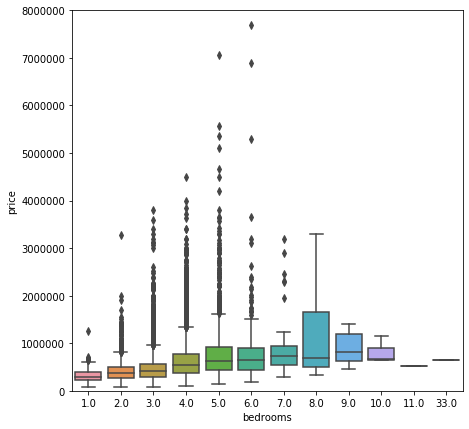

In [35]:
# boxplot bedrooms/price
bedrooms='bedrooms'
data=pd.concat([df_housedata['price'], df_housedata[bedrooms]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=bedrooms, y='price', data=data)
fig.axis(ymin=0, ymax=8000000);

- clear correlation with # of bedrooms and price
- there are 11 and 33 bedrooms?!
- those have to be incorrect, the price is much lower than expected for a home of that size

In [36]:
df_housedata['bedrooms'].sort_values(ascending=False).head()

15856    33.0
8748     11.0
19239    10.0
13301    10.0
15147    10.0
Name: bedrooms, dtype: float64

In [37]:
df_housedata=df_housedata.drop(df_housedata.index[15856])

In [38]:
df_housedata['bedrooms'].sort_values(ascending=False).head()

8748     11.0
13301    10.0
15147    10.0
19239    10.0
4231      9.0
Name: bedrooms, dtype: float64

In [39]:
df_housedata=df_housedata.drop(df_housedata.index[8748])

In [40]:
df_housedata['bedrooms'].sort_values(ascending=False).head()

15147    10.0
19239    10.0
13301    10.0
8537      9.0
16830     9.0
Name: bedrooms, dtype: float64

- removed the outliers with 11 and 33 bedrooms

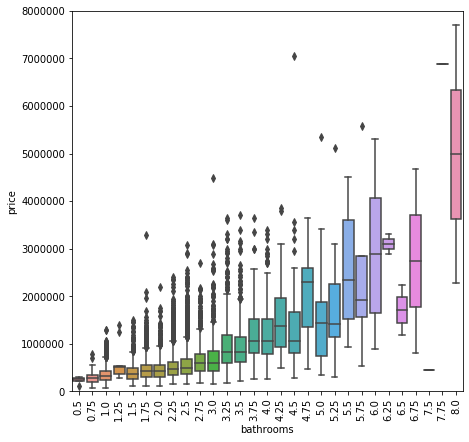

In [41]:
# boxplot bathrooms/price
bathrooms='bathrooms'
data=pd.concat([df_housedata['price'], df_housedata[bathrooms]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=bathrooms, y='price', data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=8000000);

- clear correlation with # of bathrooms and price

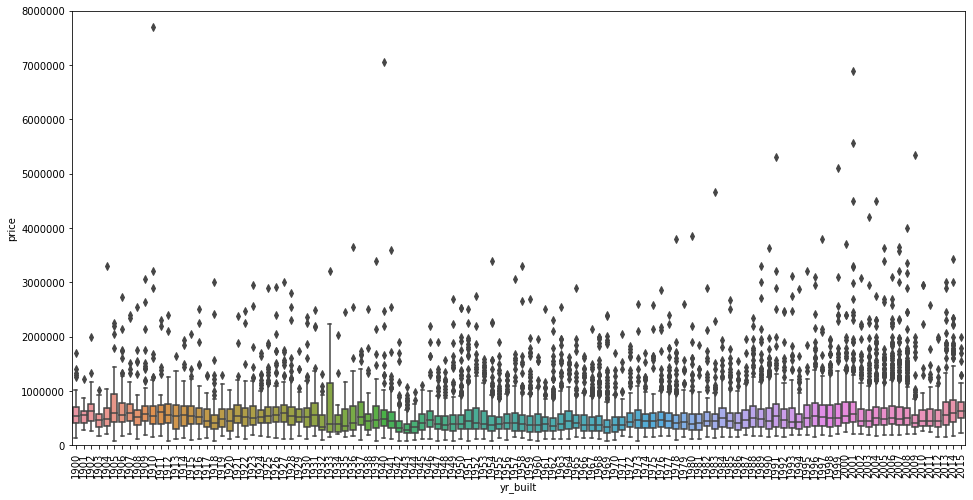

In [42]:
# boxplot yr_built/price
yr_built='yr_built'
data=pd.concat([df_housedata['price'], df_housedata[yr_built]], axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=yr_built, y='price', data=data)
fig.axis(ymin=0, ymax=8000000)
plt.xticks(rotation=90);

- no correlation between yr_built and price, surprisingly

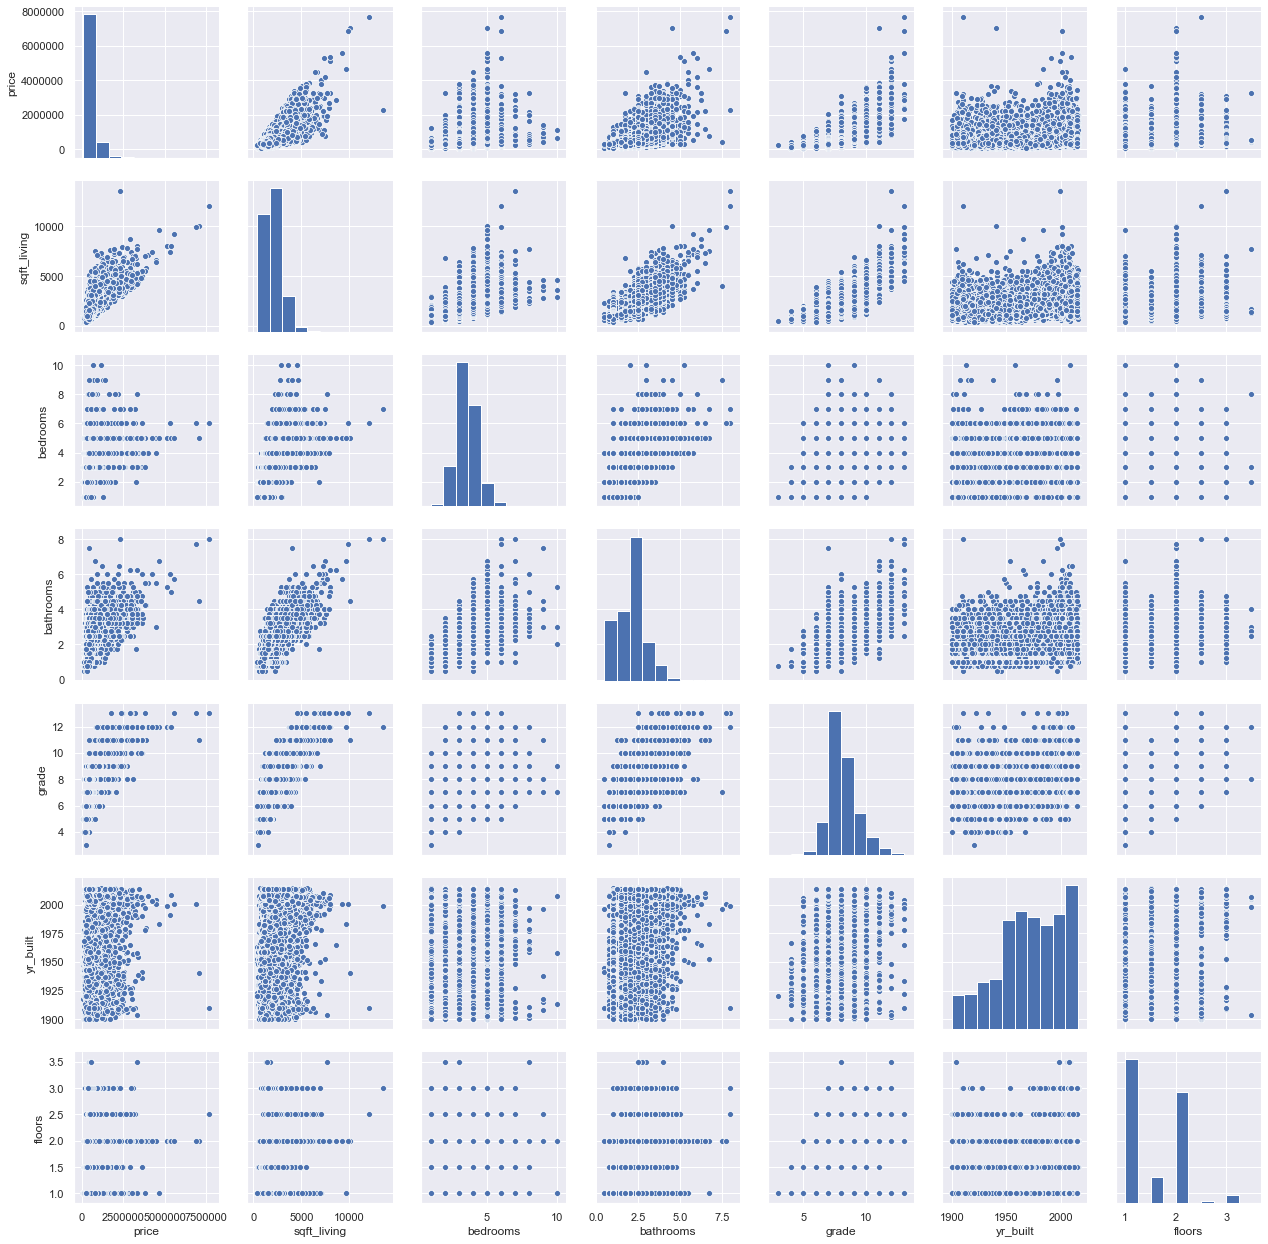

In [43]:
sns.set()
cols=['price','sqft_living','bedrooms','bathrooms', 'grade', 'yr_built','floors']
sns.pairplot(df_housedata[cols],size=2.5)
plt.show()

- note that sqft_living, bedrooms, bathrooms, floors, and grade all correlate with price
- yr_built does not seem to show any relationship with price

# Standardizing Data
- mitigate skewness and kurtosis seen with histogram of price
- normalize or transform data to get a better idea of distribution

In [44]:
#standardizing data to mitigate skewness and kurtosis
from sklearn.preprocessing import StandardScaler
price_scaled = StandardScaler().fit_transform(df_housedata['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.25836447]
 [-1.25292045]
 [-1.25019845]
 [-1.24747644]
 [-1.24611544]
 [-1.24475443]
 [-1.24203243]
 [-1.23931042]
 [-1.23931042]
 [-1.23522741]]

outer range (high) of the distribution:
[[10.75113011]
 [10.77835018]
 [11.24109136]
 [12.43877441]
 [12.95595572]
 [13.09205607]
 [13.69089759]
 [17.28394674]
 [17.74668792]
 [19.48877235]]


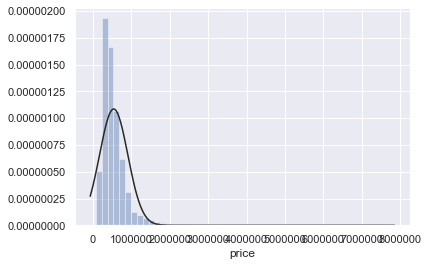

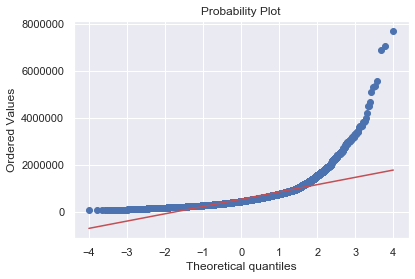

In [45]:
from scipy.stats import norm
from scipy import stats

#histogram and normal probability plot
sns.distplot(df_housedata['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df_housedata['price'], plot=plt)

In [46]:
#applying log transformation
df_housedata['price'] = np.log(df_housedata['price'])

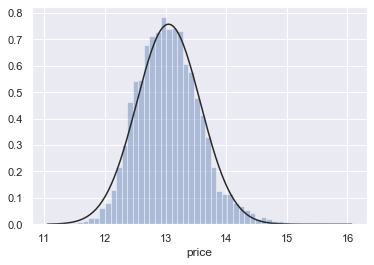

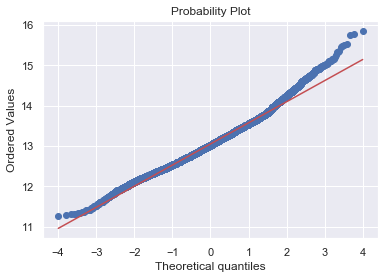

In [47]:
#transformed histogram and normal probability plot
sns.distplot(df_housedata['price'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df_housedata['price'], plot=plt)

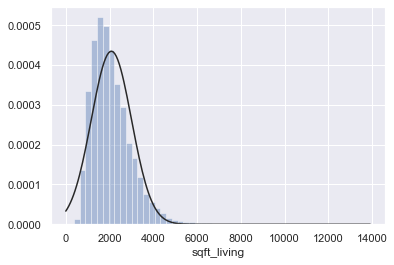

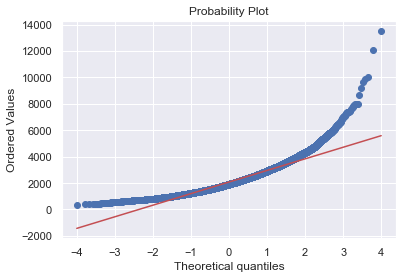

In [48]:
#histogram and normal probability plot
sns.distplot(df_housedata['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df_housedata['sqft_living'], plot=plt)

In [49]:
#applying log transformation
df_housedata['sqft_living'] = np.log(df_housedata['sqft_living'])

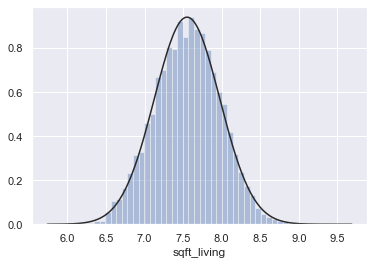

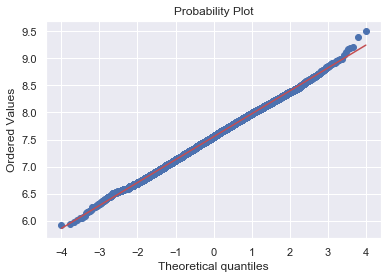

In [50]:
#transformed histogram and normal probability plot
sns.distplot(df_housedata['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df_housedata['sqft_living'], plot=plt)

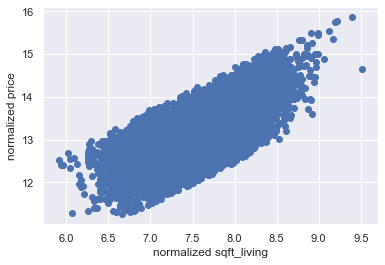

In [51]:
#scatter plot
plt.xlabel('normalized sqft_living')
plt.ylabel('normalized price')
plt.scatter(df_housedata['sqft_living'], df_housedata['price']);

# Regression Analysis
- price has the highest correlation with sqft_living
- will use sqft_living as feature while creating regression 
- model a linear relationship between a response and just one explanatory variable

## Simple Model: Linear Regression

In [52]:
train_data, test_data = train_test_split(df_housedata, train_size =0.8, random_state = 3)
reg = linear_model.LinearRegression()
x_train = np.array(train_data['sqft_living']).reshape(-1,1)
y_train = np.array(train_data['price']).reshape(-1, 1)
reg.fit(x_train, y_train)

#evaluate simple model
x_test = np.array(test_data['sqft_living']).reshape(-1, 1)
y_test = np.array(test_data['price']).reshape(-1, 1)
pred = reg.predict(x_test)
print('Simple Model')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(x_train, y_train), 3))
print('R-squared (testing) ', round(reg.score(x_test, y_test), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Simple Model
Mean Squared Error (MSE)  0.39
R-squared (training)  0.454
R-squared (testing)  0.459
Intercept:  [6.76236467]
Coefficient: [[0.83256656]]


- the R-squared (testing) value = 0.467 which means this is not a great model (aim for anything close to 1.0)

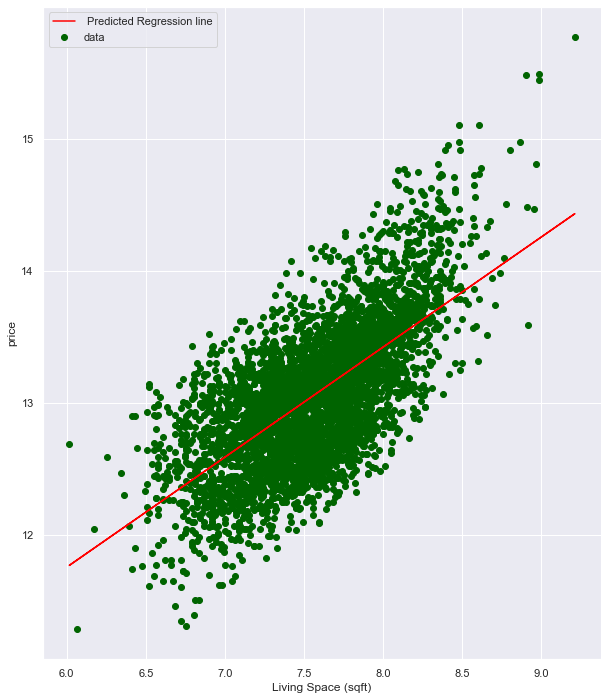

In [53]:
_, ax = plt.subplots(figsize= (10, 12))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Complex Modeling: Multicolinearity

- Linear Regression model:

In [54]:
features1 = ['bathrooms','sqft_living','grade', 'sqft_above']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Complex Model_1')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Complex Model_1
Mean Squared Error (MSE)  0.36
R-squared (training)  0.548
R-squared (testing)  0.55
Intercept:  7.785411018119354
Coefficient: [-1.16764228e-02  4.94524706e-01  2.15608343e-01 -5.42102576e-05]


In [55]:
features1 = ['bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_basement']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Complex Model_2
Mean Squared Error (MSE)  0.34
R-squared (training)  0.584
R-squared (testing)  0.585
Intercept:  10.031334248249271
Coefficient: [-2.19815310e-02 -2.28771132e-02  1.80137625e-01  3.79980803e-02
  3.21899036e-01  7.92013494e-02  1.89052975e-01  1.06926612e-04
  2.21044606e-04]


- both linear regression models above result in lower R-squared values than we'd like
- try polynomial regression to see if this improves our modeling

## Polynomial Regression Model:

In [56]:
polyfeat = PolynomialFeatures(degree =2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly = linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
predp= poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], predp)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_3
Mean Squared Error (MSE)  0.34
R-squared (training)  0.599
R-squared (testing)  0.594


In [57]:
polyfeat = PolynomialFeatures(degree =3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly = linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
predp= poly.predict(xtest_poly)

print('Complex Model_4')
mean_squared_error = metrics.mean_squared_error(test_data['price'], predp)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_4
Mean Squared Error (MSE)  0.36
R-squared (training)  0.618
R-squared (testing)  0.539


- polynomial regressions show to be a more accurate model for this dataset
- having a degree of 2 results in an R-squared (testing) value of 0.586
- while not that much better, the model is better than that polynomial regression with a degree of 3

## Ordinary Least Squares Regression Model: 

In [71]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

col_names = df_housedata.describe().columns[1:20]

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value']]
for idx, val in enumerate(col_names):
    print('price~' + val)
    f = 'price~' + val
    model = smf.ols(formula=f, data=df_housedata).fit()
    x_new = pd.DataFrame({val: [df_housedata[val].min(), df_housedata[val].max()]});
    predictions = model.predict(x_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[idx+1])
    print(model.summary())

price~price
['price', 1.0, 1.2434497875801753e-14, 0.9999999999999996, 0.0]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.210e+32
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:25:26   Log-Likelihood:             6.7309e+05
No. Observations:               21595   AIC:                        -1.346e+06
Df Residuals:                   21593   BIC:                        -1.346e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [59]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,price,1,1.24345e-14,1,0
2,bedrooms,0.123459,12.3571,0.204977,0
3,bathrooms,0.303906,12.2495,0.377491,0
4,sqft_living,0.455393,6.72302,0.837692,0
5,sqft_lot,0.0100069,13.029,1.27191e-06,3.76091e-49
6,floors,0.0965108,12.5953,0.303114,0
7,waterfront,0.029147,13.0408,1.09703,6.37409e-141
8,view,0.118797,12.9928,0.237339,0
9,condition,0.00151023,12.9409,0.0314591,1.11239e-08


- overall, you can see that with the OLS regression analysis, the variables that influence price the most seem to be:
    - bathrooms
    - sqft_living
    - grade
- it's also important to note that our polynomial regression analysis resulted in higher R-Squared (testing) values with respect to some of these variables

# Conclusion
- In our OLS modeling, it was clear that the variables that influenced housing price the most were: 
    - bathrooms
    - sqft_living
    - grade
    - sqft_above
- There were some initial outliers I had to remove and other missing data to clean up prior to completing this analysis
- 75% of the homes have these parameters:
    - $645,000 or less
    - 4 bedrooms
    - 2.5 bathrooms
    - 2550.0 square feet of living space
    - 2 floors

### Given this information, it is clear that the variables that most significantly influence housing prices in King County, WA are number of bathrooms and square footage of living area. 